------------------------------------------------------------------------------------------------------------------------------------------------------

## PEAK AND PEDESTAL VARIABLES NOTEBOOK


##### PLEASE! When you are done with the tutorial, move to the ```notebooks``` folder to start your own analysis 
 In this way, you will be able to keep the tutorial as a reference for future use (or others to use it).

------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import sys; sys.path.insert(0, '../'); from lib import *;
from scipy import stats as st
figure_features()

You have latex installed!. Applying default configuration (tex=True)


In [2]:
# Set options for general visualitation
OPT  = {
    "MICRO_SEC":   True,                # Time in microseconds (True/False)
    "NORM":        False,               # Runs can be displayed normalised (True/False)
    "ALIGN":       True,                # Aligns waveforms in peaktime (True/False)
    "LOGY":        False,               # Runs can be displayed in logy (True/False)
    "SHOW_AVE":    "",                  # If computed, vis will show average (AveWvf,AveWvfSPE,etc.)
    "SHOW_PARAM":  False,               # Print terminal information (True/False)
    "CHARGE_KEY":  "ChargeAveRange",    # Select charge info to be displayed. Default: "ChargeAveRange" (if computed)
    "PEAK_FINDER": False,               # Finds possible peaks in the window (True/False)
    "LEGEND":      True,                # Shows plot legend (True/False)
    "SHOW":        True
    }

In [3]:
INPUT_FILE = "Feb22_2"; OV = 2; PRESET ="ALL"
info = read_input_file(INPUT_FILE)  # Read input file
channels = [0,1,6]
channels = [6]

#-------------------------------- LOAD RUNS ---------------------------------#
run_keys = ["CALIB_RUNS","LIGHT_RUNS","ALPHA_RUNS","MUONS_RUNS","NOISE_RUNS"]
run_keys = ["CALIB_RUNS","ALPHA_RUNS"]
run_keys = ["ALPHA_RUNS"]
nruns = dict.fromkeys(run_keys)
for key in run_keys:
    try:               nruns[key] = info[key][OV] # Store runs in dictionary
    except IndexError: nruns.pop(key)
print(nruns)

runs = dict.fromkeys(nruns.keys())
for run in runs: runs[run] = load_npy(np.asarray([nruns[run]]).astype(int),np.asarray(channels).astype(int),preset=PRESET,info=info,compressed=True)
#----------------------------------------------------------------------------#

{'ALPHA_RUNS': 26}
load_npy --> DONE!



## HIST1D

### 1. AMPLITUDE PLOT TO DEFINE THRESHOLDS

/afs/ciemat.es/user/p/perezl/Analysis_Laura/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



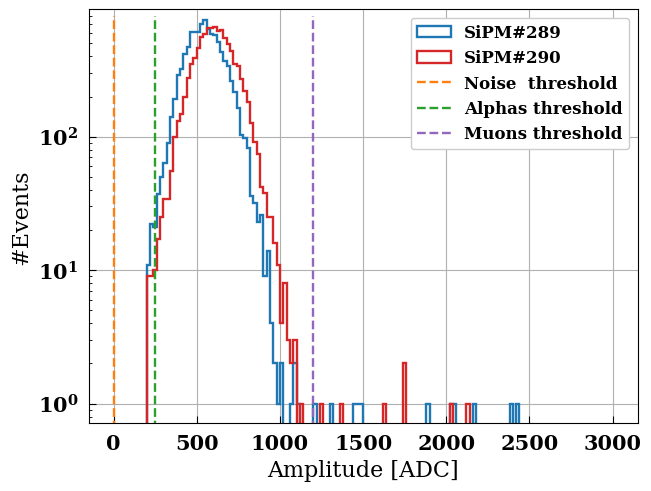

In [7]:
channel = 0
my_runs = runs["ALPHA_RUNS"][runs["ALPHA_RUNS"]["NRun"][0]]

# plt.figure(dpi=200)
plt.hist(my_runs[0]["AnaPeakAmp"],bins=150,range=[0,3000],histtype="step",color="C0",linewidth=1.7, label="SiPM#289")
plt.hist(my_runs[1]["AnaPeakAmp"],bins=150,range=[0,3000],histtype="step",color="C3",linewidth=1.7, label="SiPM#290")
# plt.hist(my_runs["Alpha"][0]["AnaPeakAmp"],bins=150,range=[0,3000],histtype="step",color="C0",label="SiPM#289")
# plt.hist(my_runs["Alpha"][1]["AnaPeakAmp"],bins=150,range=[0,3000],histtype="step",label="SiPM#290")
# plt.hist(my_runs["Alpha"][6]["AnaPeakAmp"],bins=150,range=[0,3000],histtype="step",label="X-ARAPUCA")

plt.vlines(0,   ymin=0,ymax=800,color="C1", linestyles="dashed",linewidth=1.7,label="Noise  threshold")
plt.vlines(250, ymin=0,ymax=800,color="C2", linestyles="dashed",linewidth=1.7,label="Alphas threshold")
plt.vlines(1200,ymin=0,ymax=800,color="C4", linestyles="dashed",linewidth=1.7,label="Muons threshold")

plt.semilogy()
plt.ylim([0,900])
plt.grid()
plt.legend()
plt.ylabel("#Events")
plt.xlabel("Amplitude [ADC]")
plt.show()

### 2. PeakTime

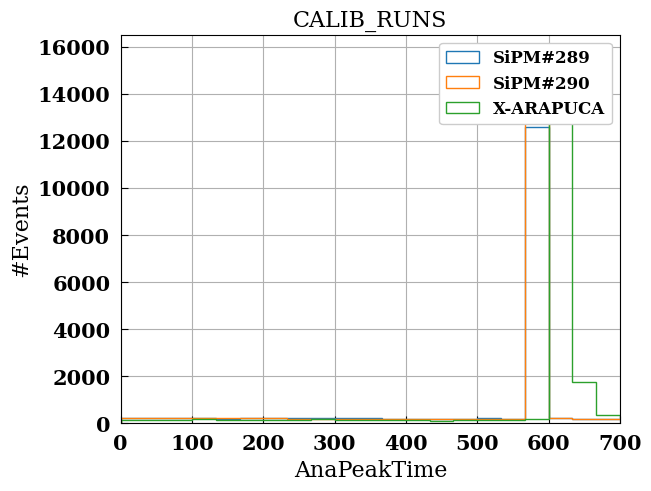

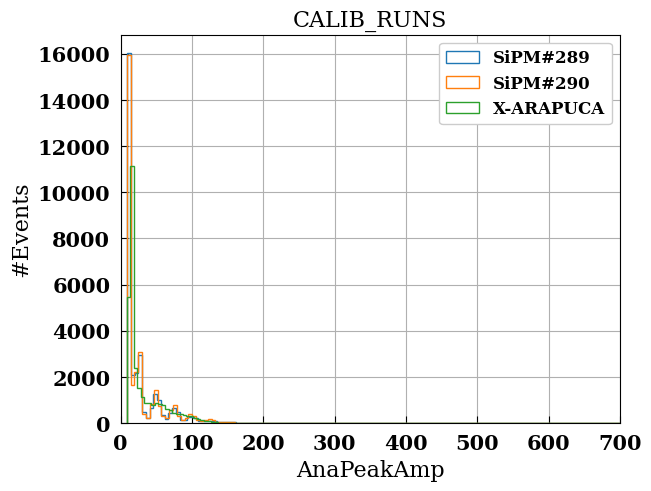

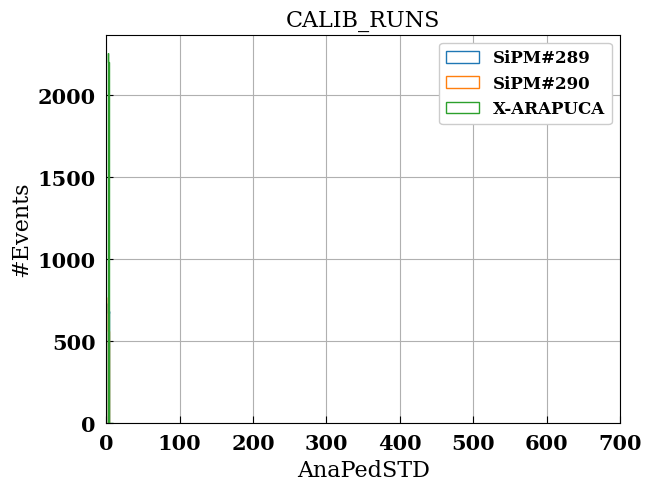

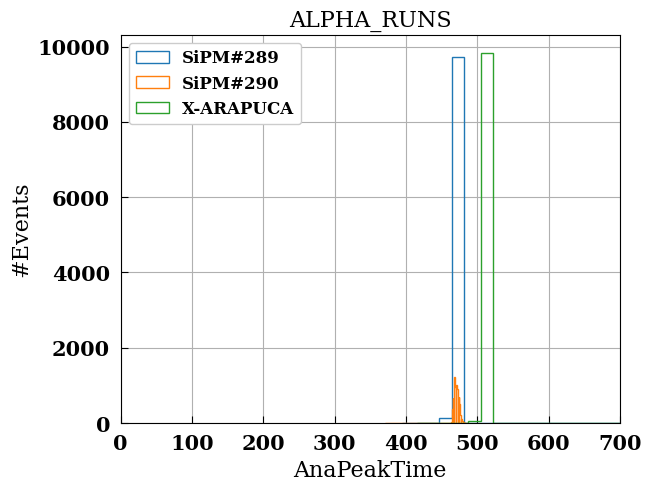

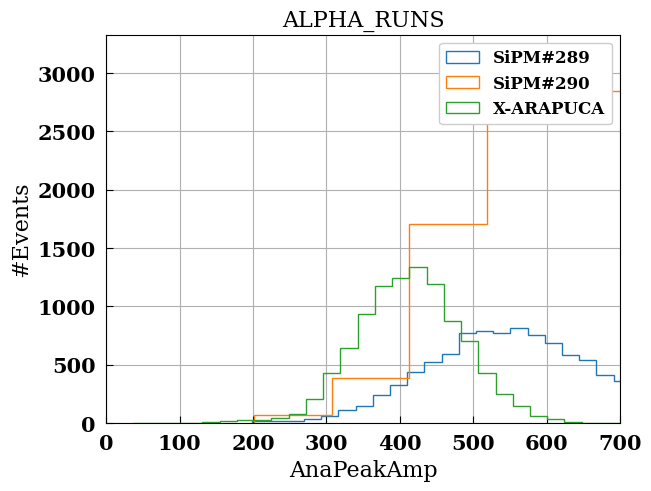

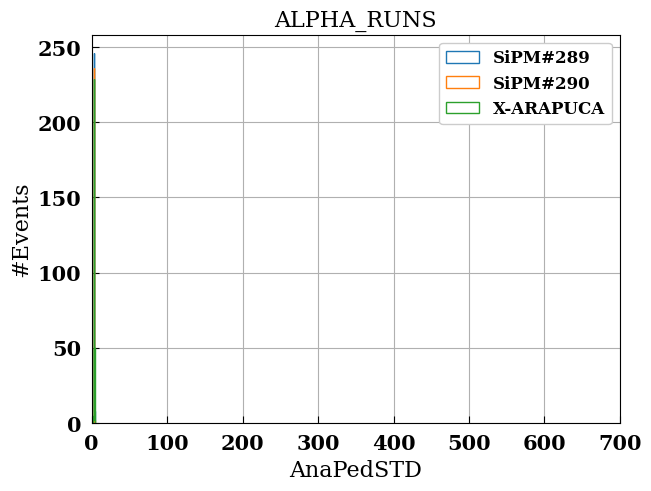

In [10]:
channels = [0,1,6]; labels = ["SiPM#289","SiPM#290","X-ARAPUCA"]; keys2plot = ["AnaPeakTime","AnaPeakAmp","AnaPedSTD"]
for RUN2PLOT in ["CALIB_RUNS", "ALPHA_RUNS"]:
    my_runs = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]]
    for key2plot in keys2plot:
        for c,ch in enumerate(channels):
        # vis_var_hist(my_runs_calib, [key], OPT={"SHOW":False})
            plt.hist(my_runs[ch][key2plot],bins=150,histtype="step",label=labels[c])

            # mode = st.mode(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key2plot])[0]
            # plt.vlines(mode-50,ymin=0,ymax=800,color="C3", linestyles="dashed",linewidth=1.7,label="min")
            # plt.vlines(mode+150,ymin=0,ymax=800,color="C4", linestyles="dashed",linewidth=1.7,label="max")
        plt.grid()
        plt.legend()
        # plt.semilogy()
        plt.ylabel("#Events")
        plt.xlabel(key2plot)
        plt.title(RUN2PLOT)
        plt.show()

### 3. Charge Distributions 

In [5]:
alpha_runs = [24,25,26,27,46,47,48,67,68,69,123,124,125]
alpha_runs = [13,36,79]
my_runs_alpha = load_npy(np.asarray(alpha_runs).astype(int),np.asarray(channels).astype(int),preset=PRESET,info=info,compressed=True)

load_npy --> DONE!

load_npy --> DONE!

load_npy --> DONE!



In [47]:
my_runs_alpha

{'NRun': array([ 24,  25,  26,  27,  46,  47,  48,  67,  68,  69, 123, 124, 125]),
 'NChannel': array([6]),
 24: {6: {'RawADC': array([[4187., 4190., 4191., ..., 4190., 4189., 4193.],
          [4194., 4196., 4192., ..., 4188., 4194., 4184.],
          [4192., 4193., 4193., ..., 4191., 4191., 4192.],
          ...,
          [4188., 4188., 4186., ..., 4192., 4195., 4192.],
          [4184., 4189., 4190., ..., 4197., 4198., 4193.],
          [4188., 4188., 4194., ..., 4200., 4200., 4200.]]),
   'RawPeakAmp': array([4697., 4501., 4637., ..., 4650., 4490., 4528.]),
   'RawPeakTime': array([508, 515, 512, ..., 509, 512, 507]),
   'RawPedSTD': array([3.38199645, 3.03438626, 2.77351762, ..., 3.19849965, 3.15366454,
          3.39411255]),
   'RawPedMean': array([4190.61, 4191.55, 4191.26, ..., 4190.64, 4192.12, 4190.8 ]),
   'RawPedMax': array([4199., 4200., 4198., ..., 4198., 4198., 4200.]),
   'RawPedMin': array([4182., 4185., 4184., ..., 4180., 4184., 4183.]),
   'RawPedLim': array(410),


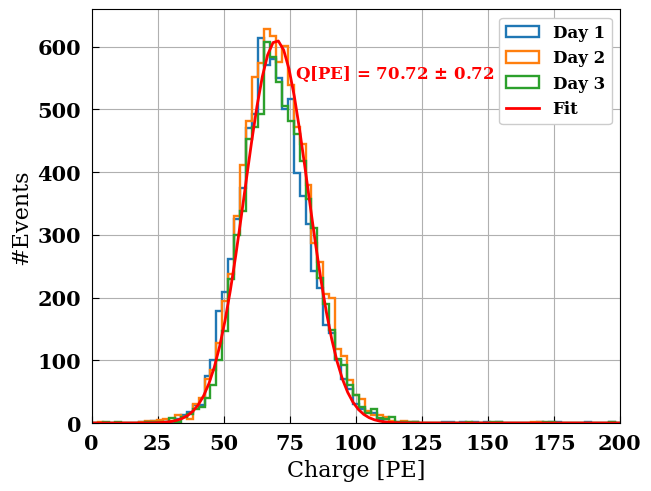

In [71]:
# plt.figure(dpi=200)
ch = 6
factor2PE = 1/6.41e2 # GAIN IN ADC*ticks TO CONVER CHARGE INTO PE
factor2PE = 1/9.01e2 # GAIN IN ADC*ticks TO CONVER CHARGE INTO PE
for r,alpha_run in enumerate(my_runs_alpha["NRun"]):
    plt.hist(my_runs_alpha[alpha_run][ch]["AnaChargeAveRange"]*factor2PE,
            bins=200,range=[0,450],histtype="step",linewidth=1.7,label="Day %i"%(r+1))
    hist, bin_edges = np.histogram(my_runs_alpha[alpha_run][ch]["AnaChargeAveRange"]*factor2PE, bins=100,density=True)  # Adjust the number of bins as needed

    # Calculate bin centers from bin edges
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Initial guess for Gaussian parameters
    initial_guess = [1000, np.mean(my_runs_alpha[alpha_run][ch]["AnaChargeAveRange"]*factor2PE), np.std(my_runs_alpha[alpha_run][ch]["AnaChargeAveRange"]*factor2PE)]

    # Fit the histogram data to the Gaussian model
    fit_params, _ = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
plt.plot(np.linspace(0,200,100), gaussian(np.linspace(0,200,100), 70,610,12), color="red",label=r'Fit')  # Plot the fitted Gaussian curve
plt.annotate(text=r"Q[PE] = %.2f $\pm$ %.2f"%(70.72,0.72),xy=(77,550),fontsize=12,color="red")
plt.xlim([0,200])
plt.xlabel("Charge [PE]")
plt.ylabel("#Events")
plt.legend()
plt.grid()
plt.show()


In [4]:
my_runs_alpha = load_npy(np.asarray([69]).astype(int),np.asarray([0]).astype(int),preset=PRESET,info=info,compressed=True)

load_npy --> DONE!



In [84]:
my_runs_alpha[68][6].keys()

dict_keys(['RawADC', 'RawPeakAmp', 'RawPeakTime', 'RawPedSTD', 'RawPedMean', 'RawPedMax', 'RawPedMin', 'RawPedLim', 'Sampling', 'RawValleyAmp', 'RawValleyTime', 'RawPreTriggerSTD', 'RawPreTriggerMean', 'RawPreTriggerMax', 'RawPreTriggerMin', 'RawPedStart', 'RawPedEnd', 'AnaPeakAmp', 'AnaPeakTime', 'AnaValleyAmp', 'AnaValleyTime', 'AnaPreTriggerSTD', 'AnaPreTriggerMean', 'AnaPreTriggerMax', 'AnaPreTriggerMin', 'AnaPedSTD', 'AnaPedMean', 'AnaPedMax', 'AnaPedMin', 'AnaPedLim', 'AnaPedStart', 'AnaPedEnd', 'TimeStamp', 'NBinsWvf', 'AnaAveWvf', 'AnaChargeRangeDict', 'AnaChargeAveRange', 'AnaChargePedRange0', 'AnaChargePedRange1', 'AnaChargePedRange2', 'AveWvf', 'GaussAveWvf', 'Label', 'PChannel'])

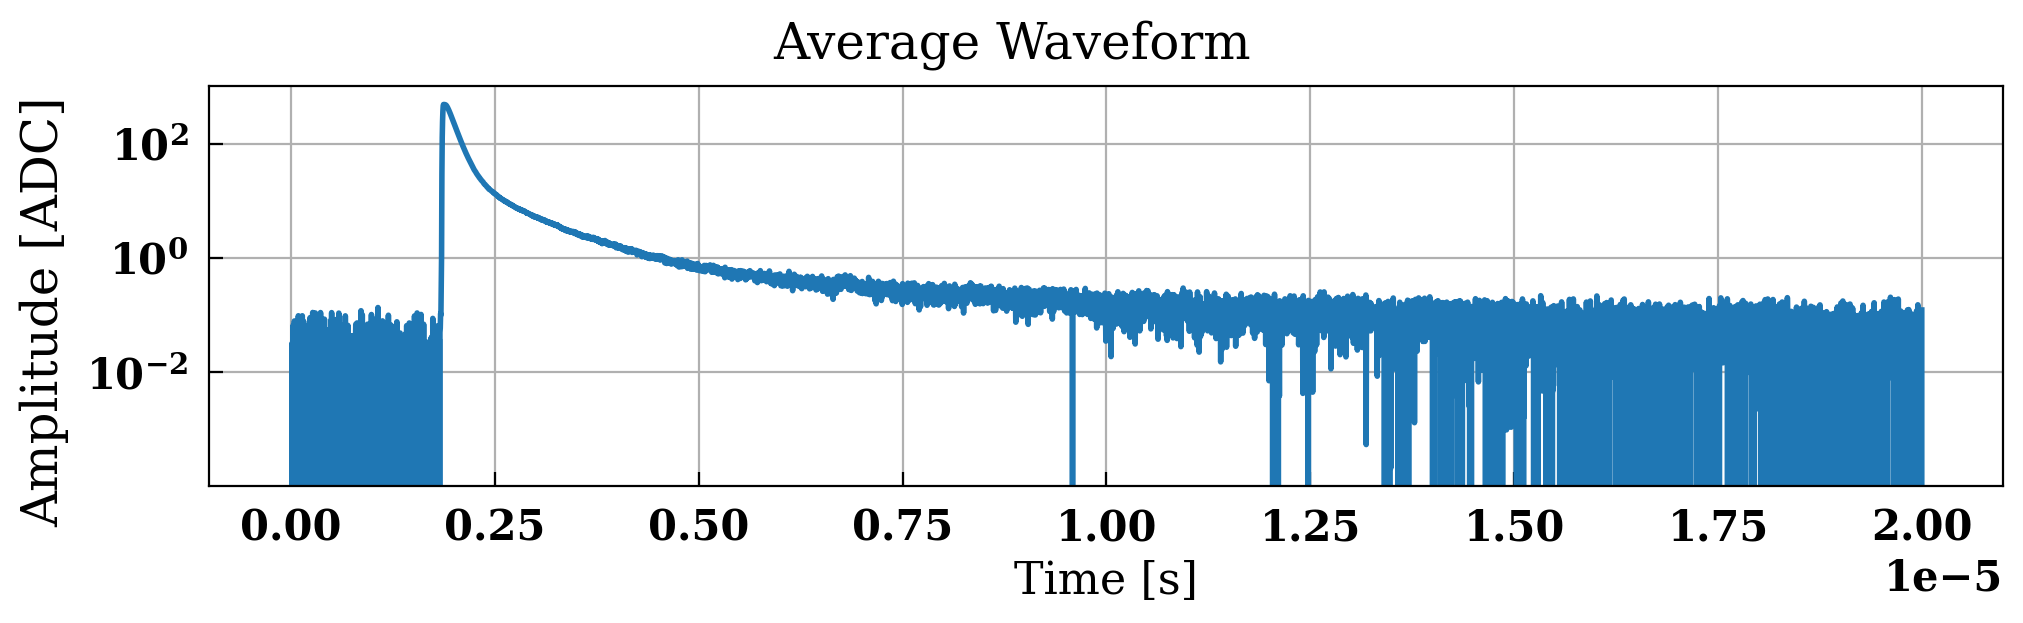

In [9]:
key = "AnaAveWvf"; rs = 69; channels = [0]

# nch=len(channels); 
nrun=len(runs.values()); ncol=int((nrun+1)/2); nrow=int((nrun)/2); axs = []

fig, axs = plt.subplots(dpi=200,ncols=nrun,figsize=[10,3],sharey=True)
plt.suptitle("Average Waveform")
fig.supylabel("Amplitude [ADC]")
for r,run in enumerate(runs.keys()):
    for c,ch in enumerate(channels):
        time_wvf = np.arange(len(my_runs_alpha[rs][ch][key][0]))*4e-9
        AveWvf = my_runs_alpha[rs][ch][key][0]
        # AveWvf = AveWvf / np.max(AveWvf)
        ref_max_idx = np.argmax(AveWvf)
        idx_move    = np.argmax(AveWvf)
        AveWvf      = shift(AveWvf, ref_max_idx-idx_move, cval = 0)
        axs.plot(time_wvf, AveWvf,label="Raw waveform")

        # time_wvf = np.arange(len(my_runs_alpha[rs][ch]["AveWvf"][0]))*4e-9
        # AveWvf = my_runs_alpha[rs][ch]["AveWvf"][0]
        # AveWvf = AveWvf / np.max(AveWvf)
        # ref_max_idx = np.argmax(AveWvf)
        # idx_move    = np.argmax(AveWvf)
        # AveWvf      = shift(AveWvf, ref_max_idx-idx_move, cval = 0)
        # axs.plot(time_wvf, AveWvf,label="Raw waveform")

        # time_wvf = np.arange(len(my_runs_alpha[rs][ch]["GaussAveWvf"][0]))*4e-9
        # GaussAveWvf = my_runs_alpha[rs][ch]["GaussAveWvf"][0]
        # GaussAveWvf = GaussAveWvf / np.max(GaussAveWvf)
        # GaussAveWvf = shift(GaussAveWvf, ref_max_idx-idx_move, cval = 0)
        # axs.plot(time_wvf, GaussAveWvf,label="Deconvoluted waveform (Gauss)")
        
        # axs.legend()
        axs.semilogy()
        axs.grid()
        # axs.set_xlim([0,8e-6])
        # axs.set_ylim([1e-3,1e4])
        axs.set_xlabel("Time [s]")
plt.show()

## HIST2D

### 1. CHARGE VS AMPLITUDE --> CUTS

22867.560000000143
9.05999999999949


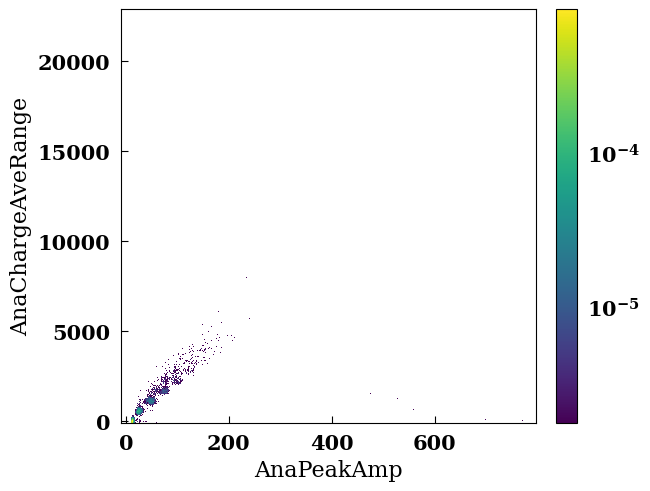

27208.18999999995
8.450000000000728


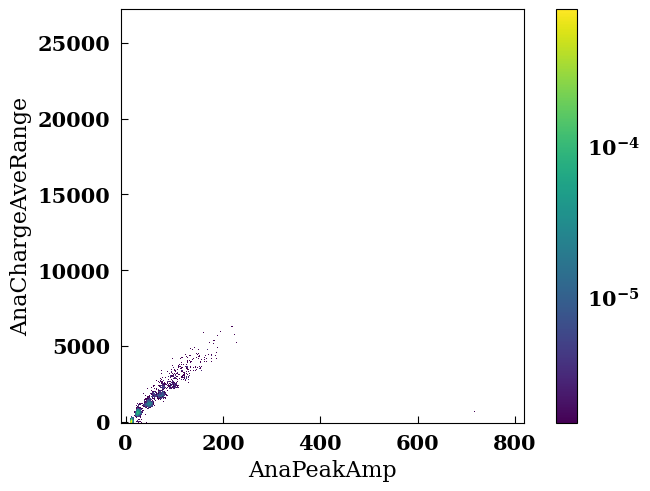

54823.799999999916
8.6899999999996


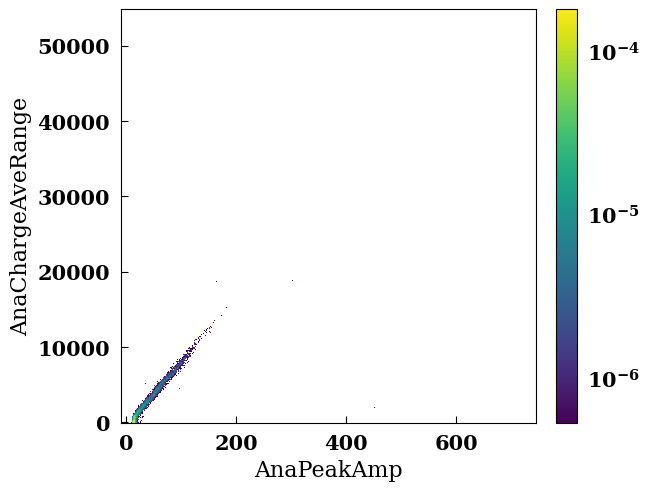

In [4]:
# %matplotlib ipympl

RUN2PLOT = "CALIB_RUNS"; ch = 0
xvar = "AnaPeakAmp"
yvar = "AnaChargeAveRange"
plt.ioff()
for c,ch in enumerate(channels):
    plt.figure()
    plt.hist2d(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][xvar],
               runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][yvar],
               bins=1000,density=True, cmap = viridis, norm=LogNorm())
    # plt.xlim([-10,max(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][xvar])])
    # plt.ylim([-100,max(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][yvar])])
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    plt.colorbar()
    plt.ion()
    plt.show()

795.6299999999992


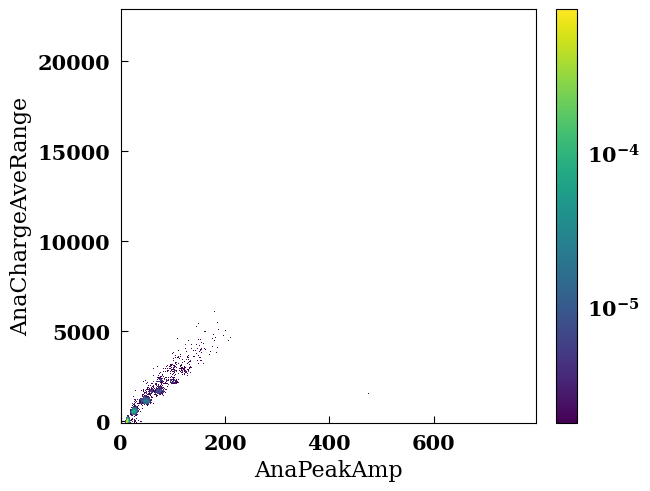

In [ ]:
%matplotlib inline

RUN2PLOT = "CALIB_RUNS"; ch = 0
xvar = "AnaPeakAmp"
yvar = "AnaChargeAveRange"
for c,ch in enumerate(channels):
    plt.figure()
    plt.hist2d(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][xvar],
               runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][yvar],
               bins=1000,density=True, cmap = viridis, norm=LogNorm())
    print(max(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][xvar]))
    plt.xlim([0,max(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][xvar])])
    plt.ylim([-100,max(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][yvar])])
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    plt.colorbar()
    plt.show()

## PERSISTENCE 

In [22]:
from scipy import stats as st

In [43]:
RUN2PLOT = "CALIB_RUNS"; ch = 0; key_peaktime = "RawPeakTime"

peak_time = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key_peaktime]
ptime_min = peak_time>(st.mode(peak_time)[0]-20)
ptime_max = peak_time<(st.mode(peak_time)[0]+80)

CUT_ptime = ptime_min * ptime_max
print("CUT peaktime min: %0.2f"%(len(peak_time[ptime_min==True])*100/len(peak_time)))
print("CUT peaktime max: %0.2f"%(len(peak_time[ptime_max==True])*100/len(peak_time)))
print("CUT peaktime min_max: %0.2f"%(len(peak_time[CUT_ptime])*100/len(peak_time)))

CUT peaktime min: 89.49
CUT peaktime max: 52.73
CUT peaktime min_max: 42.22


In [229]:
RUN2PLOT = "CALIB_RUNS"; ch = 0; key_peaktime = "AnaPeakTime"

peak_time = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key_peaktime]
ptime_min = peak_time>4.19e-6
ptime_max = peak_time<4.22e-6

CUT_ptime = ptime_min * ptime_max
print("CUT peaktime min: %0.2f"%(len(peak_time[ptime_min==True])*100/len(peak_time)))
print("CUT peaktime max: %0.2f"%(len(peak_time[ptime_max==True])*100/len(peak_time)))
print("CUT peaktime min_max: %0.2f"%(len(peak_time[CUT_ptime])*100/len(peak_time)))

CUT peaktime min: 99.88
CUT peaktime max: 0.12
CUT peaktime min_max: 0.00


In [53]:
RUN2PLOT = "CALIB_RUNS"; ch = 6; key_peakamp = "RawPeakAmp"

peak_amp = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key_peakamp]
pamp_min = peak_amp>4200
pamp_max = peak_amp<4300

CUT_pamp = pamp_min * pamp_max
print("CUT peak_amp min: %0.2f"%(len(peak_amp[pamp_min==True])*100/len(peak_amp)))
print("CUT peak_amp max: %0.2f"%(len(peak_amp[pamp_max==True])*100/len(peak_amp)))
print("CUT peak_amp min_max: %0.2f"%(len(peak_amp[CUT_pamp])*100/len(peak_amp)))

CUT peak_amp min: 100.00
CUT peak_amp max: 97.64
CUT peak_amp min_max: 97.64


In [231]:
RUN2PLOT = "CALIB_RUNS"; ch = 0; key_pedstd = "AnaPedSTD"

ped_std = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key_pedstd]
std_min = ped_std>-1
std_max = ped_std<4.8

CUT_std = std_min * std_max
print("CUT peak_amp min: %0.2f"%(len(ped_std[std_min==True])*100/len(ped_std)))
print("CUT peak_amp max: %0.2f"%(len(ped_std[std_max==True])*100/len(ped_std)))
print("CUT peak_amp min_max: %0.2f"%(len(ped_std[CUT_std])*100/len(ped_std)))

CUT peak_amp min: 100.00
CUT peak_amp max: 100.00
CUT peak_amp min_max: 100.00


In [20]:
my_runs = (runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["RawADC"].T-runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["RawPedMean"]).T

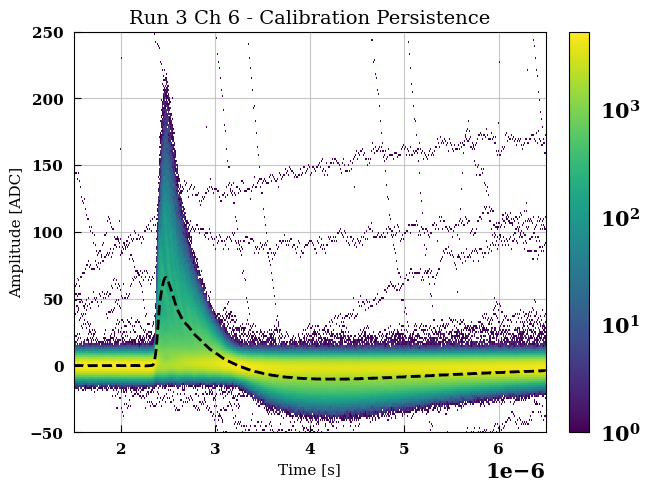

In [26]:
RUN2PLOT = "CALIB_RUNS"; ch = 6; key = "RawADC"

data_flatten = my_runs.flatten() ##### Flatten the data array
time = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["Sampling"]*np.arange(len(my_runs[0])) # Time array
time_flatten = np.array([time] * int(len(data_flatten)/len(time))).flatten()

plt.hist2d(time_flatten,data_flatten,density=True, bins=[5000,1500], cmap = viridis, norm=LogNorm())
plt.plot(time,runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["AnaAveWvfSIGNAL"][0], "--", color="k",label="Average Waveform")
del data_flatten, time, time_flatten
plt.colorbar()
plt.xlim([0.15e-5,0.65e-5])
plt.ylim([-50,250])
plt.grid(True, alpha = 0.7) # , zorder = 0 for grid behind hist
plt.title("Run {} Ch {} - Calibration Persistence".format(runs[RUN2PLOT]["NRun"][0],ch),size = 14)
plt.xticks(size = 11); plt.yticks(size = 11)
plt.xlabel("Time [s]", size = 11); plt.ylabel("Amplitude [ADC]", size = 11)
plt.show()

In [ ]:
RUN2PLOT = "CALIB_RUNS"; ch = 6; key = "RawADC"

data_flatten = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key].flatten() ##### Flatten the data array
# data_flatten = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["RawADC"][CUT_ptime].flatten() ##### Flatten the data array
time = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["Sampling"]*np.arange(len(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key][0])) # Time array
time_flatten = np.array([time] * int(len(data_flatten)/len(time))).flatten()

plt.hist2d(time_flatten,data_flatten,density=True, bins=[5000,1500], cmap = viridis, norm=LogNorm())
# plt.plot(time,runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["AnaAveWvfSIGNAL"][0])
del data_flatten, time, time_flatten
plt.colorbar()
plt.xlim([0.15e-5,0.65e-5])
# plt.ylim([4000,4500])
plt.grid(True, alpha = 0.7) # , zorder = 0 for grid behind hist
plt.title("Run {} Ch {} - Calibration Persistence".format(runs[RUN2PLOT]["NRun"][0],ch),size = 14)
plt.xticks(size = 11); plt.yticks(size = 11)
plt.xlabel("Time [s]", size = 11); plt.ylabel("Amplitude [ADC]", size = 11)
plt.show()